In [8]:
import numpy as np
import matplotlib.pyplot as plt # Changed import
import pandas as pd

# data preparation

np.random.seed(42) #valeurs aléatoires produites: les mêmes à chaque exécution

# 10 villes de 1 à 10
cities = [f"city_{i}" for i in range(1, 11)]

# 12 mois
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Génération de données aléatoires entre -5°C et 35°C
temps = np.random.uniform(low=-5.0, high=35.0, size=(len(cities), len(months)))
temps = np.round(temps, 0)  # arrondir à l'unité

# Création du DataFrame
df_temps = pd.DataFrame(temps, index=cities, columns=months)

# Aperçu
print(df_temps.head())

         Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec
city_1  10.0  33.0  24.0  19.0   1.0   1.0  -3.0  30.0  19.0  23.0  -4.0  34.0
city_2  28.0   3.0   2.0   2.0   7.0  16.0  12.0   7.0  19.0   1.0   7.0  10.0
city_3  13.0  26.0   3.0  16.0  19.0  -3.0  19.0   2.0  -2.0  33.0  34.0  27.0
city_4   7.0  -1.0  22.0  13.0  -0.0  15.0  -4.0  31.0   5.0  22.0   7.0  16.0
city_5  17.0   2.0  34.0  26.0  33.0  31.0  19.0  32.0  -1.0   3.0  -3.0   8.0


In [4]:
# data analysis

# 1️⃣ Moyenne annuelle par ville
annual_avg = df_temps.mean(axis=1)
print("Annual average temperature (°C):")
print(annual_avg)

# 2️⃣ Identifier les extrêmes
hottest_city = annual_avg.idxmax()  #ville la plus chaude
coldest_city = annual_avg.idxmin()  #ville la plus froide

print("\nCity with highest average temperature:", hottest_city, "(", round(annual_avg[hottest_city], 1), "°C )")
print("City with lowest average temperature:", coldest_city, "(", round(annual_avg[coldest_city], 1), "°C )")

Annual average temperature (°C):
city_1     15.583333
city_2      9.500000
city_3     15.583333
city_4     11.083333
city_5     16.750000
city_6     13.833333
city_7     13.250000
city_8     17.583333
city_9     11.166667
city_10    16.333333
dtype: float64

City with highest average temperature: city_8 ( 17.6 °C )
City with lowest average temperature: city_2 ( 9.5 °C )


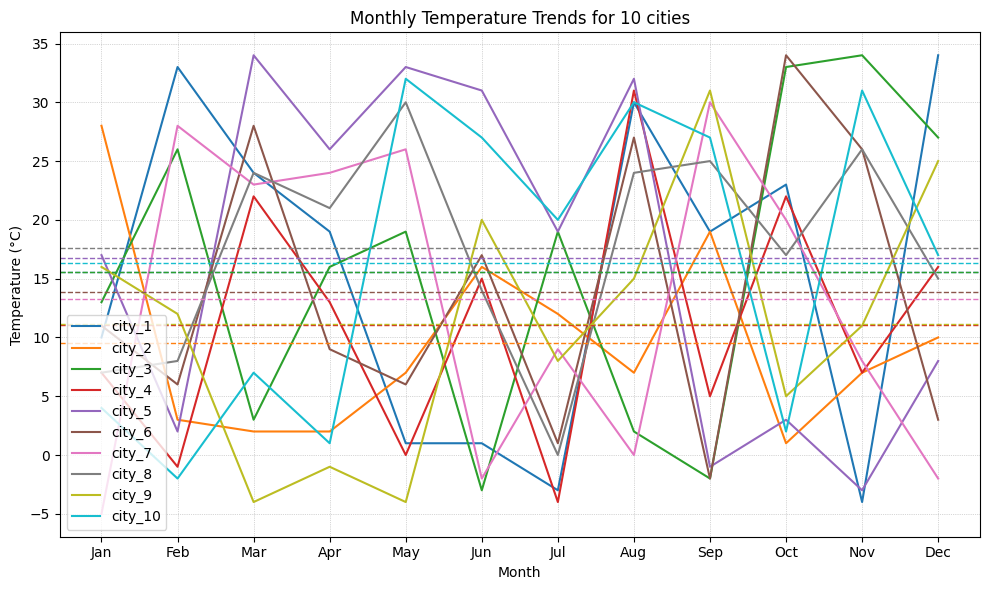

In [9]:
# visualisation

fig, ax = plt.subplots(figsize=(10, 6)) # fig: canevas pour al graph;
# ax:le système d'axes ou sont tracées les courbes

# 1) Courbes pleines (une par ville)
plotted_lines = []
for city, row in df_temps.iterrows(): # iterrows : itérer sur les lignes du dataframe
    line, = ax.plot(months, row.values, label=city) # trait plein, couleur auto
    plotted_lines.append((city, line))


# 2) Droites horizontales pointillées = moyenne annuelle, même couleur que la courbe
for city, line in plotted_lines:
    ax.axhline(y=annual_avg[city], xmin=0, xmax=1, linestyle="--", linewidth=1, color=line.get_color())

# 3) Habillage
ax.set_xlabel("Month")
ax.set_ylabel("Temperature (°C)")
ax.set_title("Monthly Temperature Trends for 10 cities")
ax.legend(loc="lower left", frameon=True)
ax.grid(True, which="both", linestyle=":", linewidth=0.5)
fig.tight_layout()
plt.show()

## Rapport synthétique — Résultats et tendances observées

### Résultats de l’analyse
- La **température moyenne annuelle** a été calculée pour chaque ville à l’aide de `DataFrame.mean(axis=1)`.  
- Sur la base du jeu de données généré :
  - **Ville la plus chaude :** `city_8` — moyenne ≈ **17,6 °C**  
  - **Ville la plus froide :** `city_2` — moyenne ≈ **9,5 °C**

### Tendances observées
- Les dix villes présentent des **variations mensuelles aléatoires**, comme attendu avec des données synthétiques uniformes.  
- L’**écart de température moyenne annuelle** entre la ville la plus chaude et la plus froide est d’environ **8 °C**.  
- Aucune **tendance saisonnière réelle** n’apparaît : les courbes mensuelles sont dispersées plutôt que sinusoïdales, par rapport à un jeu de données réel, où l'on observerait plus de cohérnec entre les mois successifs, ainsi que des variations saisonnières.
